In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [3]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [4]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


C:\Users\gmimo\AppData\Local\Temp\ipykernel_16476\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


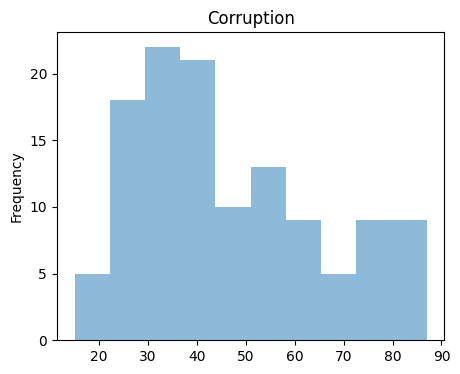

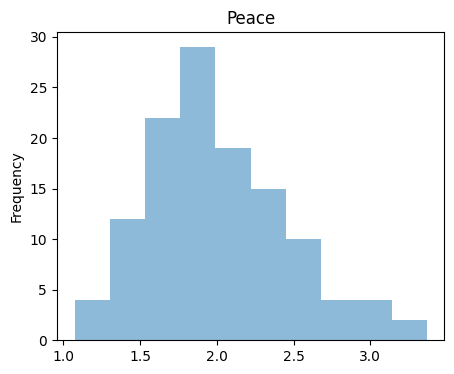

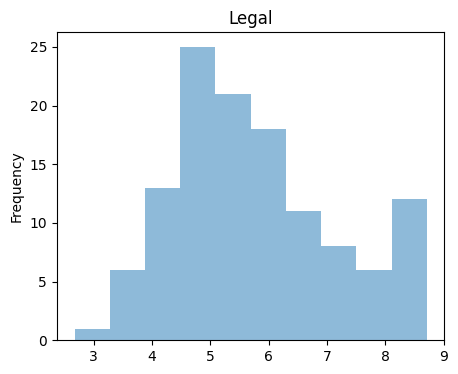

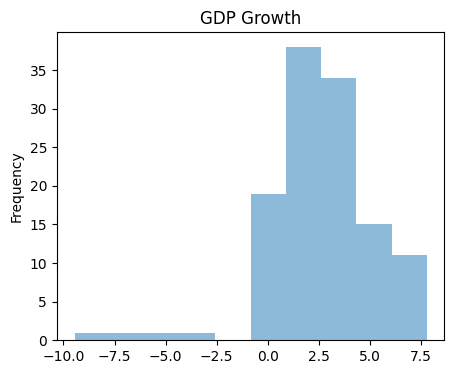

In [5]:
# plot histograms
plt.figure(1, figsize=(5,4))
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2, figsize=(5,4))
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3, figsize=(5,4))
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4, figsize=(5,4))
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [6]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


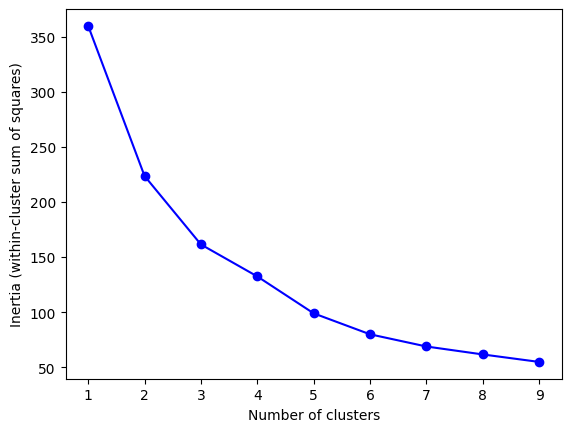

In [7]:
#Perform elbow method
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
Ks = range(1, 10)
inertia = [KMeans(i, n_init=10).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


In [8]:
#K means with k=3
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 161.13338710052554
cluster centers:  [[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]
cluster labels:  [2 2 0 2 1 1 2 2 2 1 2 2 2 1 0 2 0 2 1 0 1 2 2 1 2 1 1 0 1 2 0 2 2 1 2 1 1
 2 2 1 2 2 2 2 1 1 2 2 0 1 2 1 1 1 1 2 2 1 1 1 0 0 1 2 2 1 2 2 1 0 2 2 2 2
 2 1 1 0 0 1 1 0 2 0 2 2 1 1 1 1 0 2 0 2 2 2 1 1 1 0 1 2 1 1 1 2 2 2 0 2 0
 2 0 1 1 1 1 2 0 2 0]


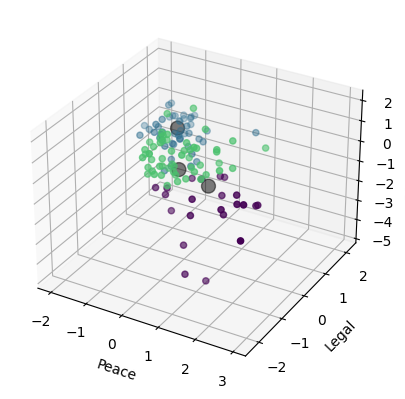

In [9]:
#Visualize the result (3D plot)
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()


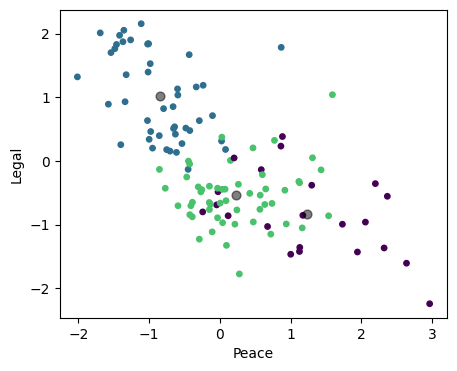

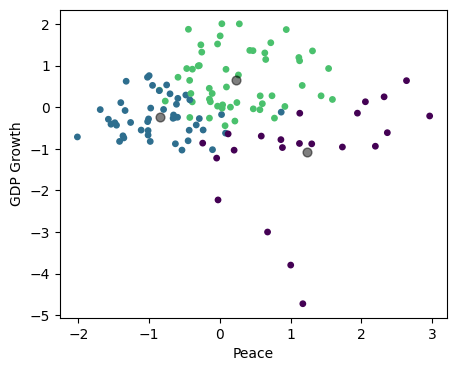

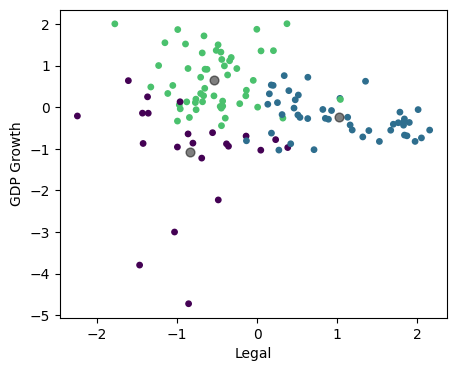

In [10]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i, figsize=(5,4))
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=15)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=40, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

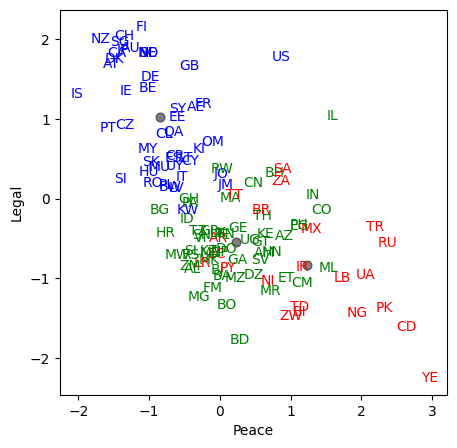

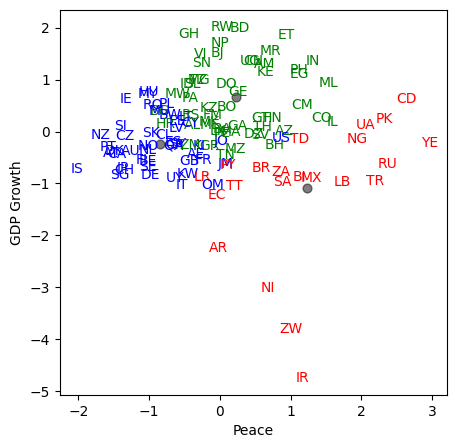

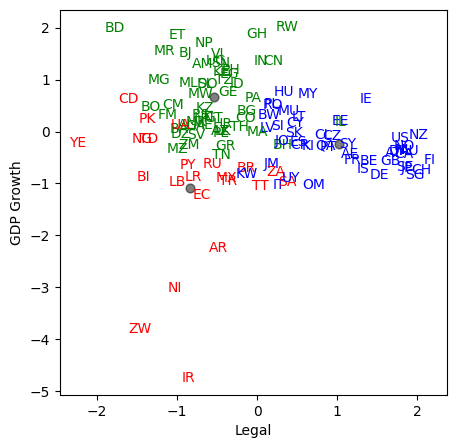

In [16]:
#Visualize the result (3 2D plots)
#plot country abbreviations instead of dots.
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['red','blue', 'green']

for i in range(3):
    fig = plt.figure(i, figsize=(5, 5))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=40, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [12]:
print(X.columns)
print(centers)

Index(['Peace', 'Legal', 'GDP Growth'], dtype='object')
[[ 1.22506036 -0.83385901 -1.07842464]
 [-0.85097477  1.02149992 -0.23897931]
 [ 0.23006626 -0.54045468  0.65506397]]


Label | Peace | Legal | GDP | => Risk
---|---|---|---|---
0|+|+|+|High
1|+++|+++|++|Moderate
2|++|++|+++|Low

In [13]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
result.loc[:, 'Risk'] = result['Label'].replace({0: 'High', 1: 'Moderate', 2: 'Low'})
with pd.option_context('display.max_rows', None, 'display.max_columns', 4):
    print(result.sort_values('Label'))


                          Country Abbrev  Label      Risk
60                        Lebanon     LB      0      High
30                        Ecuador     EC      0      High
48                           Iran     IR      0      High
61                        Liberia     LR      0      High
69                         Mexico     MX      0      High
77                      Nicaragua     NI      0      High
78                        Nigeria     NG      0      High
81                       Pakistan     PK      0      High
83                       Paraguay     PY      0      High
90                         Russia     RU      0      High
92                   Saudi Arabia     SA      0      High
99                   South Africa     ZA      0      High
108           Trinidad and Tobago     TT      0      High
110                        Turkey     TR      0      High
112                       Ukraine     UA      0      High
118                         Yemen     YE      0      High
27   Democrati

In [14]:
result.to_csv('results_kmeans_elbow.csv') 

In [15]:
X.loc[result['Abbrev'].isin(['HU','JM','JO','KW','RO'])]

,Peace,Legal,GDP Growth
44,-0.998985,0.338788,0.757671
52,0.080140,0.179391,-0.624294
54,0.023800,0.311858,-0.178461
58,-0.448588,-0.132852,-0.808400
89,-0.951312,0.200498,0.523638
